In [7]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
plt.rcParams['figure.figsize'] = [20, 10]

df1 = pd.read_csv(os.getcwd() +"/Names.csv")




In [8]:
cols = df1.columns.tolist()

cols_ordered = []
cols_ordered.append('type')
cols_ordered.append('folder')
for col in cols:
    if col not in cols_ordered:
        cols_ordered.append(col)
df2 = df1[cols_ordered].dropna()

In [9]:
df2 = df2[df2['folder']!='blaze']
y = pd.Categorical(df2.type)
cat = list(y.categories)
cat

['finance', 'math', 'music', 'vision']

In [10]:
signs = ['x','o','+','^',',','*','+']
mkr_dict = {key:signs[i] for i,key in enumerate(cat)}

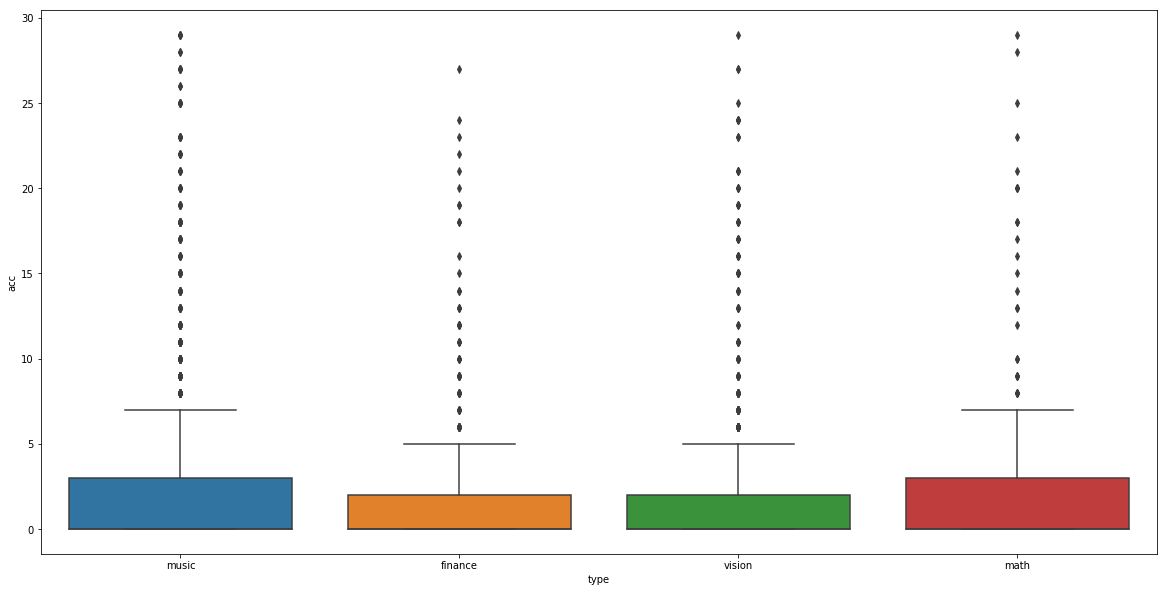

In [11]:
# for kind in mkr_dict:
#     d = df2[df2.type==kind]
#     plt.scatter(d.acc, d['loc'],marker = mkr_dict[kind])
#     plt.xlabel('acc')
#     plt.ylabel('loc')
#     plt.legend(cat)
# plt
import seaborn as sns
sns.boxplot(x='type',y='acc',data=df2[df2['acc']<30])

In [25]:
df2 = df2.sample(frac=1).reset_index(drop=True)

In [26]:
kmeans = KMeans(n_clusters=2, random_state=1).fit(df3[['acc','loc']])
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [27]:
from sklearn.neural_network import MLPClassifier
X = df2.select_dtypes(include=[np.number]).as_matrix()
y = pd.Categorical(df2.type).codes
y[:30]

array([1, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 3, 1, 3, 2, 2, 2, 2, 1, 3, 0,
       2, 2, 2, 2, 2, 0, 3, 2], dtype=int8)

In [30]:
precil = int(X.shape[0]*0.8)
x_train = X[:precil]
y_train = y[:precil]
y_train

array([1, 2, 2, ..., 3, 2, 3], dtype=int8)

In [34]:
x_test  = X[precil:]
y_test  = y[precil:]

In [61]:
clf = MLPClassifier(hidden_layer_sizes=(400,200),max_iter=1000)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accurarcy =  np.in1d(y_test,y_pred)
print (accurarcy[accurarcy[:]==True].shape[0]/accurarcy.shape[0])
y_pred[:30]

1.0


array([2, 2, 2, 2, 0, 2, 2, 2, 3, 2, 0, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2,
       2, 2, 3, 2, 2, 2, 0, 2], dtype=int8)

In [59]:

rf = RandomForestClassifier().fit(x_train,y_train)
rf.predict(x_test)[:30]

array([3, 2, 2, 3, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 3, 2, 3, 1, 2,
       2, 2, 2, 2, 2, 2, 3, 2], dtype=int8)

In [60]:
y_test[:30]

array([3, 2, 3, 3, 3, 1, 2, 3, 2, 2, 3, 2, 3, 1, 2, 2, 0, 0, 2, 0, 3, 2,
       3, 2, 0, 2, 3, 3, 0, 1], dtype=int8)

In [19]:
list(df3)


['npm',
 'acc',
 'nom',
 'npa',
 'noa',
 'cbo',
 'amloc',
 'lcom4',
 'dit',
 'noc',
 'accm',
 'loc',
 'anpm',
 'mmloc',
 'rfc',
 'sc']